<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center">ANÁLISIS INTOXICACIÓN ALIMENTARIA (parte 1)</h2>
<h3 align="center">ANÁLISIS DE CORRESPONDENCIAS MÚLTIPLES (ACM)</h3>


$\;$
### Oscar Julian Layton

---



## Datos intoxicación alimentaria

Estos datos son el resultado de una encuesta realizada a niños de la escuela primaria que sufrieron intoxicación alimentaria. Se les preguntó sobre sus síntomas y sobre lo que comían.

In [1]:
library(FactoMineR)
library(factoextra)
data(poison)
head(poison[, 1:7], 3)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


Age,Time,Sick,Sex,Nausea,Vomiting,Abdominals
9,22,Sick_y,F,Nausea_y,Vomit_n,Abdo_y
5,0,Sick_n,F,Nausea_n,Vomit_n,Abdo_n
6,16,Sick_y,F,Nausea_n,Vomit_y,Abdo_y


Los datos contienen 55 filas (individuos) y 15 columnas (variables). Utilizaremos solo algunas de estas personas (niños) y variables para realizar el análisis de correspondencia múltiple. Las coordenadas de los restantes individuos y variables en el mapa de factores se pronosticarán a partir de los resultados anteriores de MCA.

* Individuos activos (filas 1:55): individuos que se utilizan en el análisis de correspondencia múltiple.
* Variables activas (columnas 5:15): variables que se utilizan en el MCA.
* Variables suplementarias : no participan en el MCA. Se pronosticarán las coordenadas de estas variables.

* a) Variables cuantitativas suplementarias (quanti.sup): Columnas 1 y 2 correspondientes a las columnas edad y tiempo , respectivamente.

* b) Variables cualitativas suplementarias (quali.sup: Columnas 3 y 4 correspondientes a las columnas Enfermo y Sexo , respectivamente. Estas variables factoriales se utilizarán para colorear individuos por grupos.

In [2]:
poison.active <- poison[1:55, 5:15]
head(poison.active[, 1:6], 3)

Nausea,Vomiting,Abdominals,Fever,Diarrhae,Potato
Nausea_y,Vomit_n,Abdo_y,Fever_y,Diarrhea_y,Potato_y
Nausea_n,Vomit_n,Abdo_n,Fever_n,Diarrhea_n,Potato_y
Nausea_n,Vomit_y,Abdo_y,Fever_y,Diarrhea_y,Potato_y


### Resumen de los datos 

Generándose el conteo de las variables categoricas


In [3]:
# Summary of the 4 first variables
summary(poison.active)[, 1:4]

      Nausea      Vomiting   Abdominals     Fever   
 Nausea_n:43   Vomit_n:33   Abdo_n:18   Fever_n:20  
 Nausea_y:12   Vomit_y:22   Abdo_y:37   Fever_y:35  

## Visualización e interpretación

Utilizaremos el paquete factoextra R para ayudar en la interpretación y la visualización del análisis de correspondencia múltiple. No importa qué función decida utilizar [FactoMiner :: MCA (), ade4 :: dudi.mca ()], puede extraer y visualizar fácilmente los resultados del análisis de correspondencia múltiple utilizando las funciones R proporcionadas en el paquete factoextra R.

In [5]:
res.mca <- MCA(poison.active, graph = FALSE)      #Acm con FactoMineR

Los resultados de MCA se interpretan como los resultados de un análisis de correspondencia simple (CA).

#### Valores propios / variaciones

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,0.33523140,33.523140,33.52314
Dim.2,0.12913979,12.913979,46.43712
Dim.3,0.10734849,10.734849,57.17197
Dim.4,0.09587950,9.587950,66.75992
Dim.5,0.07883277,7.883277,74.64319
Dim.6,0.07108981,7.108981,81.75217
Dim.7,0.06016580,6.016580,87.76876
Dim.8,0.05577301,5.577301,93.34606
Dim.9,0.04120578,4.120578,97.46663
Dim.10,0.01304158,1.304158,98.77079


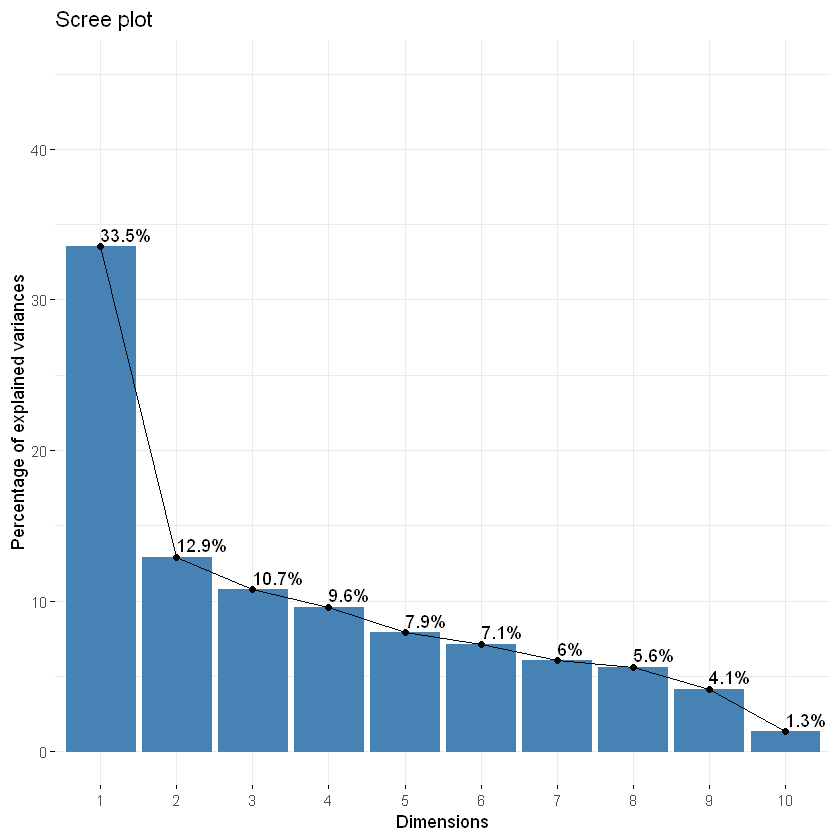

In [6]:
library("factoextra")
eig.val <- get_eigenvalue(res.mca);eig.val
 # head(eig.val)
fviz_screeplot(res.mca, addlabels = TRUE, ylim = c(0, 45))

#### Biplot

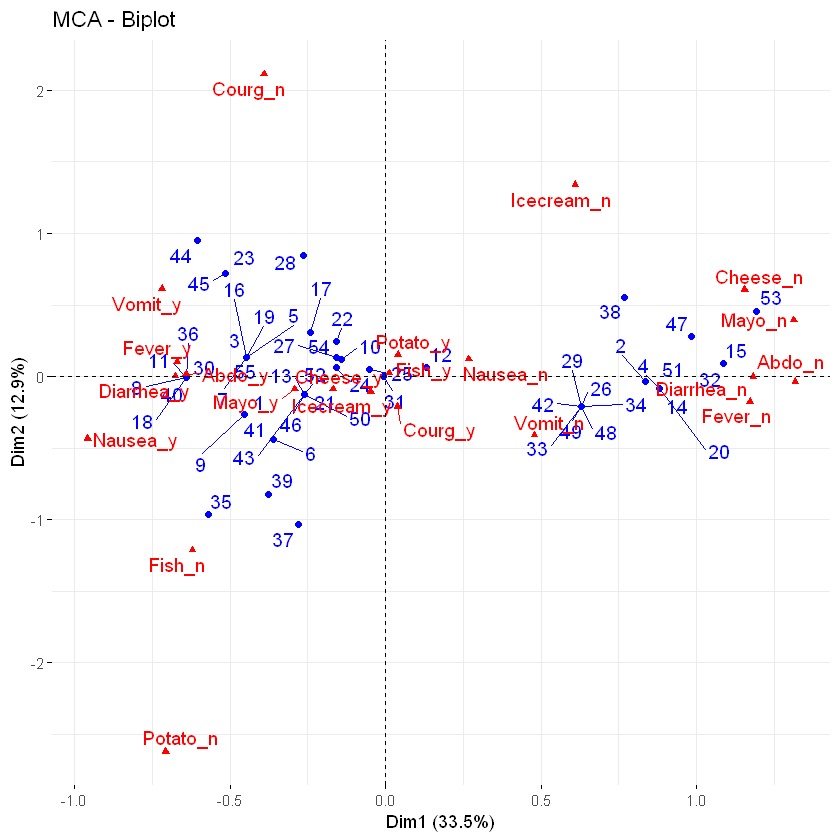

In [7]:
fviz_mca_biplot(res.mca, 
               repel = TRUE, # Avoid text overlapping (slow if many point)
               ggtheme = theme_minimal())

La gráfica anterior muestra un patrón global dentro de los datos. Las filas (individuos) están representadas por puntos azules y columnas (categorías variables) por triángulos rojos.

La distancia entre cualquier punto de fila o punto de columna da una medida de su similitud (o disimilitud). Los puntos de fila con un perfil similar están cerrados en el mapa de factores. Lo mismo es cierto para los puntos de columna.


#### Gráfico de variables 

La función get_mca_var()[en factoextra ] se utiliza para extraer los resultados para categorías variables. Esta función devuelve una lista que contiene las coordenadas, el cos2 y la contribución de las categorías de variables:

In [8]:
var <- get_mca_var(res.mca)
var

Multiple Correspondence Analysis Results for variables
  Name       Description                  
1 "$coord"   "Coordinates for categories" 
2 "$cos2"    "Cos2 for categories"        
3 "$contrib" "contributions of categories"

Tengase en cuenta que es posible trazar categorías variables y colorearlas de acuerdo con i) su calidad en el mapa de factores (cos2) o ii) sus valores de contribución a la definición de dimensiones (contrib).

In [9]:
# Coordinates
head(var$coord)
# Cos2: quality on the factore map
head(var$cos2)
# Contributions to the principal components
head(var$contrib)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,0.2673909,0.12139029,-0.265583253,0.03376130,0.07370500
Nausea_y,-0.9581506,-0.43498187,0.951673323,-0.12097801,-0.26410958
Vomit_n,0.4790279,-0.40919465,0.084492799,0.27361142,0.05245250
Vomit_y,-0.7185419,0.61379197,-0.126739198,-0.41041713,-0.07867876
Abdo_n,1.3180221,-0.03574501,-0.005094243,-0.15360951,-0.06986987
Abdo_y,-0.6411999,0.01738946,0.002478280,0.07472895,0.03399075


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,0.2562007,0.0528025759,2.527485e-01,0.004084375,0.019466197
Nausea_y,0.2562007,0.0528025759,2.527485e-01,0.004084375,0.019466197
Vomit_n,0.3442016,0.2511603912,1.070855e-02,0.112294813,0.004126898
Vomit_y,0.3442016,0.2511603912,1.070855e-02,0.112294813,0.004126898
Abdo_n,0.8451157,0.0006215864,1.262496e-05,0.011479077,0.002374929
Abdo_y,0.8451157,0.0006215864,1.262496e-05,0.011479077,0.002374929


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,1.515869,0.81100008,4.670018e+00,0.08449397,0.48977906
Nausea_y,5.431862,2.90608363,1.673423e+01,0.30277007,1.75504164
Vomit_n,3.733667,7.07226253,3.627455e-01,4.25893721,0.19036376
Vomit_y,5.600500,10.60839380,5.441183e-01,6.38840581,0.28554563
Abdo_n,15.417637,0.02943661,7.192511e-04,0.73219636,0.18424268
Abdo_y,7.500472,0.01432051,3.499060e-04,0.35620363,0.08963157



### Correlación entre variables y dimensiones principales.

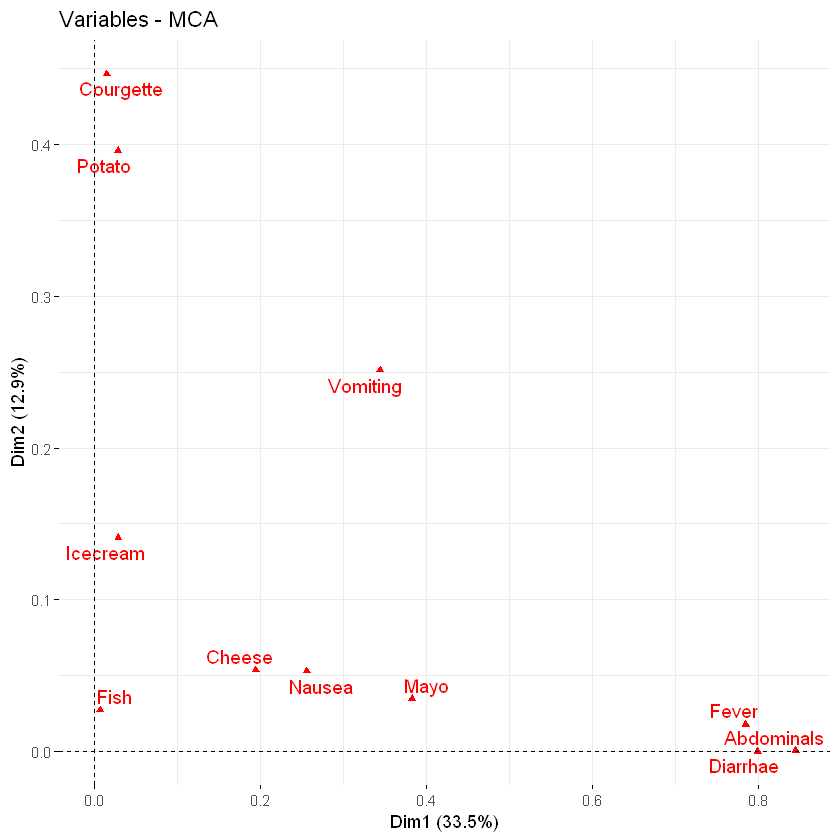

In [10]:
fviz_mca_var(res.mca, choice = "mca.cor", 
             repel = TRUE, # Avoid text overlapping (slow)
             ggtheme = theme_minimal())

La gráfica anterior ayuda a identificar las variables que están más correlacionadas con cada dimensión. Las correlaciones al cuadrado entre las variables y las dimensiones se utilizan como coordenadas.

Se puede ver que las variables Diarrea, Abdominales y Fiebre son las más correlacionadas con la dimensión 1. De manera similar, las variables Calabacín y Papa son las más correlacionadas con la dimensión 2.


#### Coordenadas de categorías variables.

A continuación las coordenadas de cada categoría de variable en cada dimensión (1, 2 y 3):

In [12]:
head(round(var$coord, 2), 4)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,0.27,0.12,-0.27,0.03,0.07
Nausea_y,-0.96,-0.43,0.95,-0.12,-0.26
Vomit_n,0.48,-0.41,0.08,0.27,0.05
Vomit_y,-0.72,0.61,-0.13,-0.41,-0.08


Para graficar las variables categóricas se tiene:

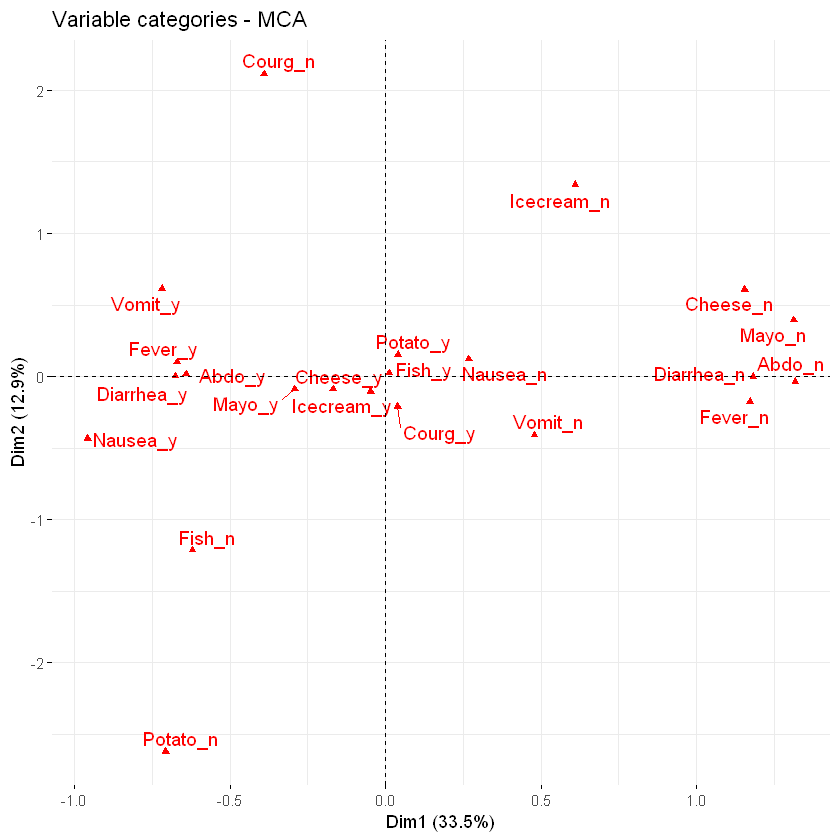

In [13]:
fviz_mca_var(res.mca, 
             repel = TRUE, # Avoid text overlapping (slow)
             ggtheme = theme_minimal())

Es posible cambiar el color y la forma de los puntos variables utilizando los argumentos col.vary de la shape.varsiguiente manera:

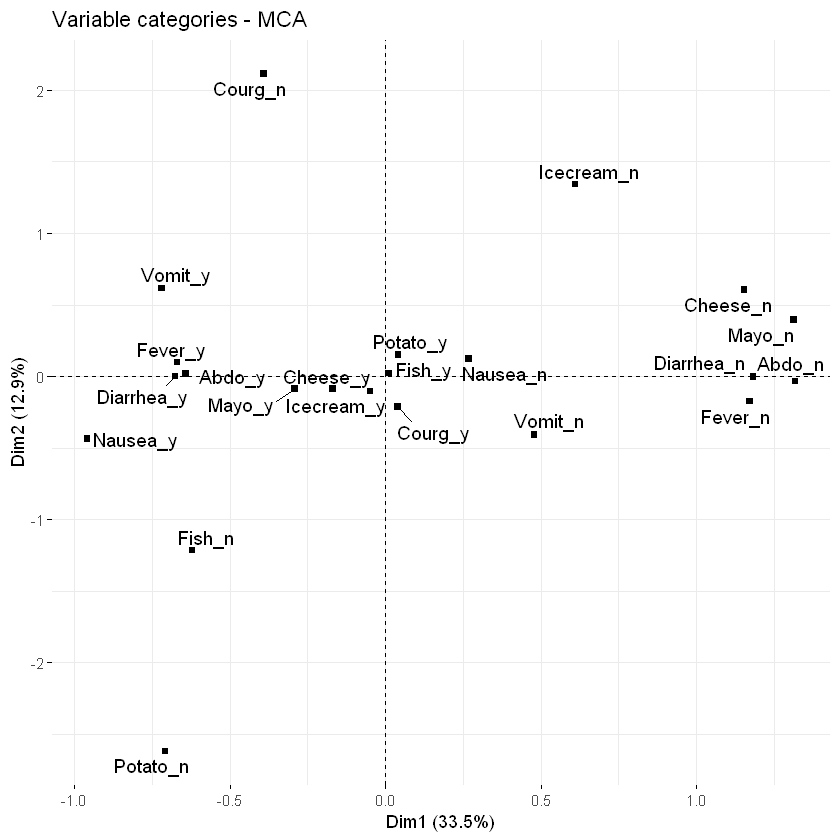

In [14]:
fviz_mca_var(res.mca, col.var="black", shape.var = 15,
             repel = TRUE)

La interepretación de la anterior grafica parte de mostrar las relaciones entre categorías variables. Se puede interpretar de la siguiente manera:

* Las categorías variables con un perfil similar se agrupan juntas.
* Las categorías de variables negativamente correlacionadas se colocan en lados opuestos del origen del gráfico (cuadrantes opuestos).
* La distancia entre los puntos de categoría y el origen mide la calidad de la categoría variable en el mapa de factores. Los puntos de categoría que están lejos del origen están bien representados en el mapa de factores.

#### Calidad de representación de categorías variables.

Las dos dimensiones 1 y 2 son suficientes para retener el 46% de la inercia total (variación) contenida en los datos. No todos los puntos se muestran igualmente bien en las dos dimensiones.

La calidad de la representación se llama coseno cuadrado (cos2), que mide el grado de asociación entre categorías variables y un eje particular. El cos2 de las categorías variables se puede extraer de la siguiente manera:

In [15]:
head(var$cos2, 4)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,0.2562007,0.05280258,0.25274850,0.004084375,0.019466197
Nausea_y,0.2562007,0.05280258,0.25274850,0.004084375,0.019466197
Vomit_n,0.3442016,0.25116039,0.01070855,0.112294813,0.004126898
Vomit_y,0.3442016,0.25116039,0.01070855,0.112294813,0.004126898


Si una categoría variable está bien representada por dos dimensiones, la suma de cos2 está cerrada a una. Para algunos de los elementos de fila, se requieren más de 2 dimensiones para representar perfectamente los datos. Para colorear las variables catergoricas segun sus cosenos cuadrados se tiene:

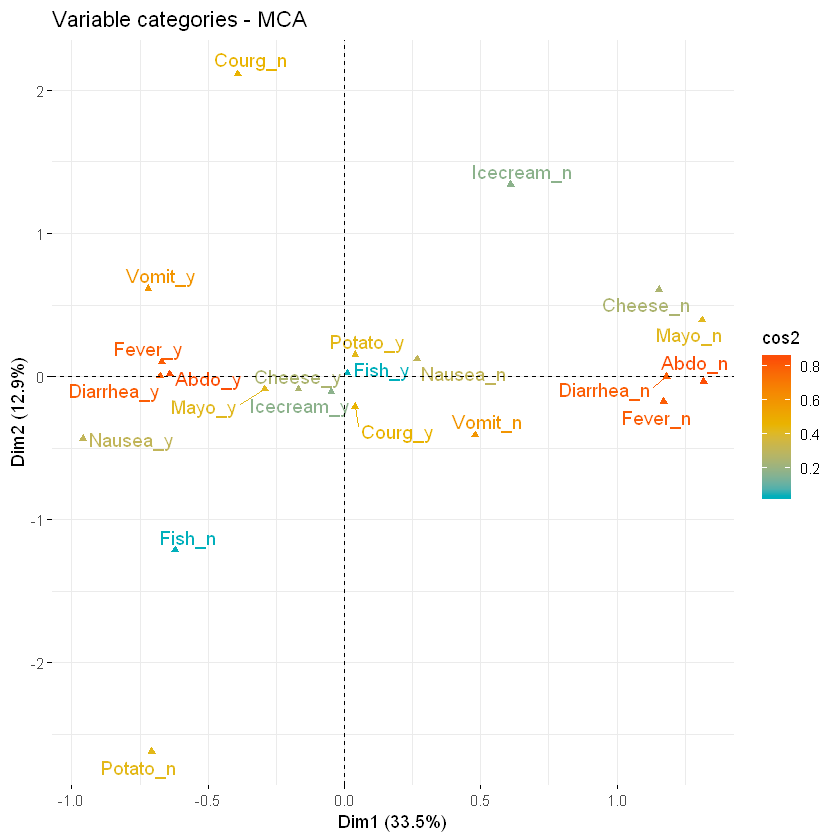

In [16]:
# Color by cos2 values: quality on the factor map
fviz_mca_var(res.mca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE, # Avoid text overlapping
             ggtheme = theme_minimal())

* Las categorías variables con valores bajos de cos2 se colorearán en "blanco"
* Las categorías variables con valores medios de cos2 serán coloreadas en "azul"
* Las categorías variables con valores altos de cos2 serán coloreadas en "rojo"

#### Contribución de categorías variables a las dimensiones.

La contribución de las categorías variables (en%) a la definición de las dimensiones se puede extraer de la siguiente manera:

In [17]:
head(round(var$contrib,2), 4)

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
Nausea_n,1.52,0.81,4.67,0.08,0.49
Nausea_y,5.43,2.91,16.73,0.30,1.76
Vomit_n,3.73,7.07,0.36,4.26,0.19
Vomit_y,5.60,10.61,0.54,6.39,0.29


Las categorías variables con el valor más grande contribuyen más a la definición de las dimensiones. Las categorías de variables que más contribuyen a Dim.1 y Dim.2 son las más importantes para explicar la variabilidad en el conjunto de datos.

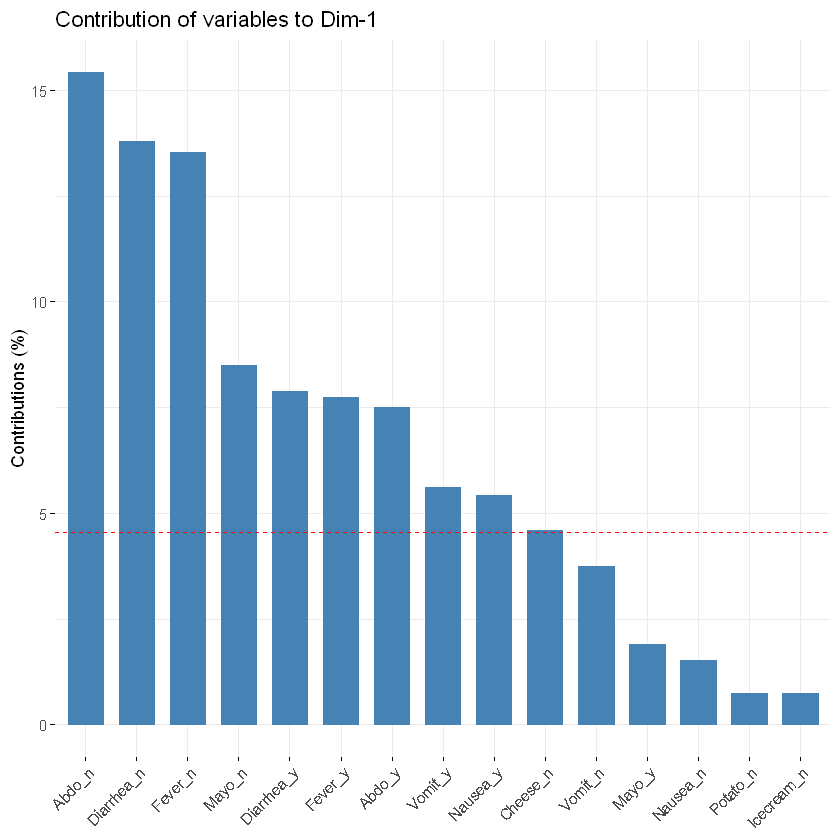

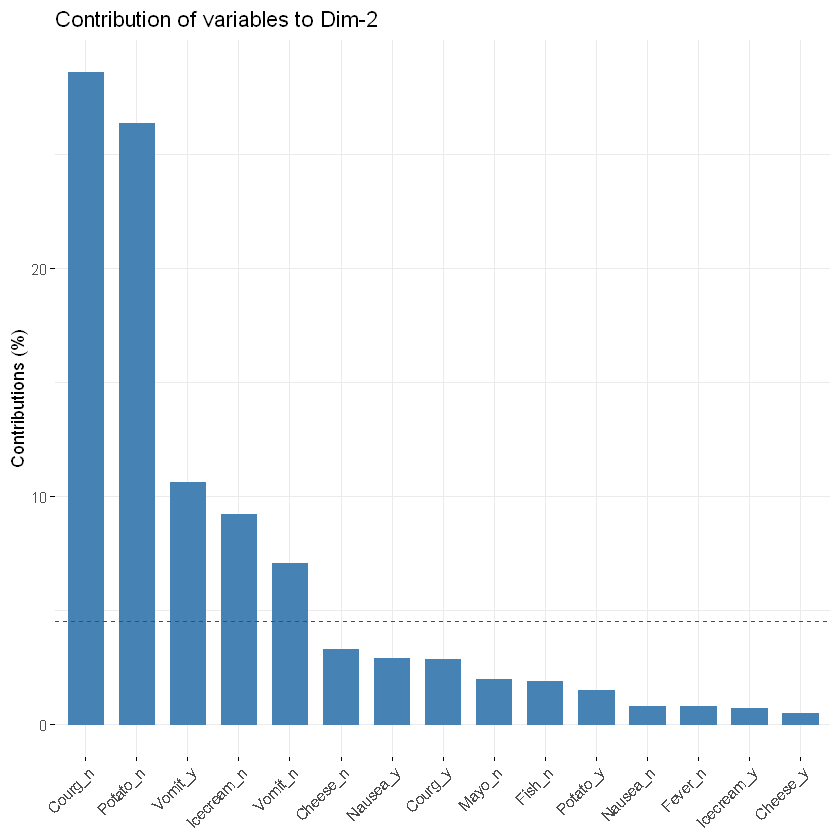

In [18]:
# Contributions of rows to dimension 1
fviz_contrib(res.mca, choice = "var", axes = 1, top = 15)
# Contributions of rows to dimension 2
fviz_contrib(res.mca, choice = "var", axes = 2, top = 15)

Puede observarse que:

* Las categorías Abdo_n, Diarrea_n, Fiebre_n y Mayo_n son las más importantes en la definición de la primera dimensión.
* Las categorías Courg_n, Potato_n, Vomit_y y Icecream_n son las que más contribuyen a la dimensión 2

Gráficamente lo anterior puede ser representado por:

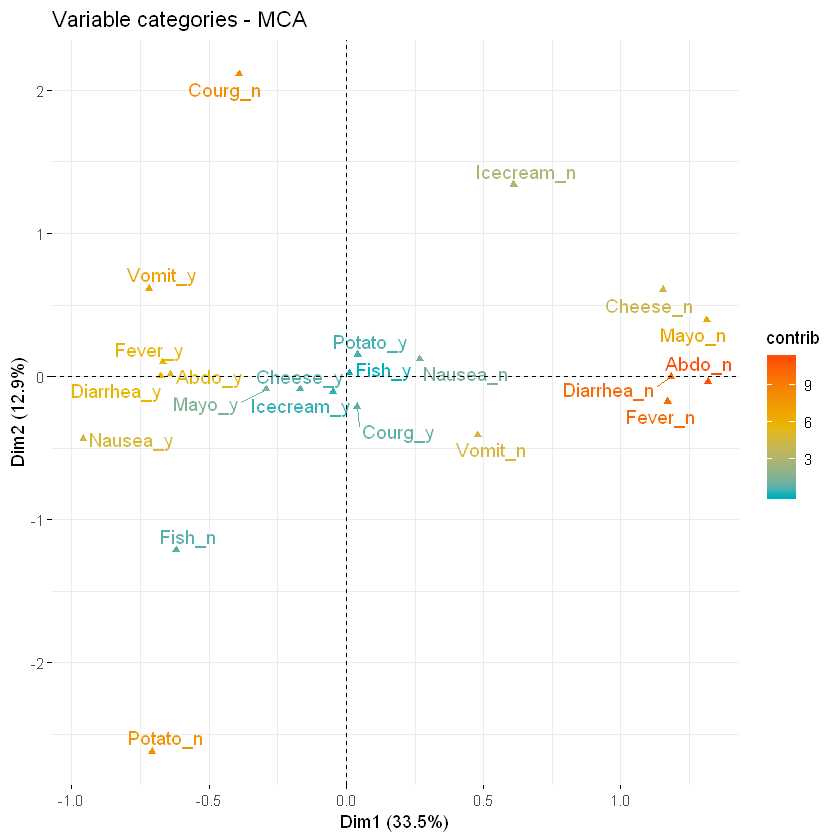

In [19]:
fviz_mca_var(res.mca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE, # avoid text overlapping (slow)
             ggtheme = theme_minimal()
             )

#### Gráfica de individuos

In [20]:
ind <- get_mca_ind(res.mca)
ind
# Coordinates of column points
head(ind$coord)
# Quality of representation
head(ind$cos2)
# Contributions
head(ind$contrib)

Multiple Correspondence Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
-0.4525811,-0.26415072,0.17151614,0.01369348,-0.11696806
0.8361700,-0.03193457,-0.07208249,-0.08550351,0.51978710
-0.4481892,0.13538726,-0.22484048,-0.14170168,-0.05004753
0.8803694,-0.08536230,-0.02052044,-0.07275873,-0.22935022
-0.4481892,0.13538726,-0.22484048,-0.14170168,-0.05004753
-0.3594324,-0.43604390,-1.20932223,1.72464616,0.04348157


Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
0.34652591,0.1180447167,0.0497683175,0.0003172275,0.0231460846
0.55589562,0.0008108236,0.0041310808,0.0058126211,0.2148103098
0.54813888,0.0500176790,0.1379484860,0.0547920948,0.0068349171
0.74773962,0.0070299584,0.0004062504,0.0051072923,0.0507479873
0.54813888,0.0500176790,0.1379484860,0.0547920948,0.0068349171
0.02485357,0.0365775483,0.2813443706,0.5722083217,0.0003637178


Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
1.110927,0.98238297,0.498254685,0.003555817,0.31554778
3.792117,0.01435818,0.088003703,0.138637089,6.23134138
1.089470,0.25806722,0.856229950,0.380768961,0.05776914
4.203611,0.10259105,0.007132055,0.100387990,1.21319013
1.089470,0.25806722,0.856229950,0.380768961,0.05776914
0.700692,2.67693398,24.769968729,56.404214518,0.04360547


La gráfica de los individuos correspondiente a sus valores cosenos está dado por 

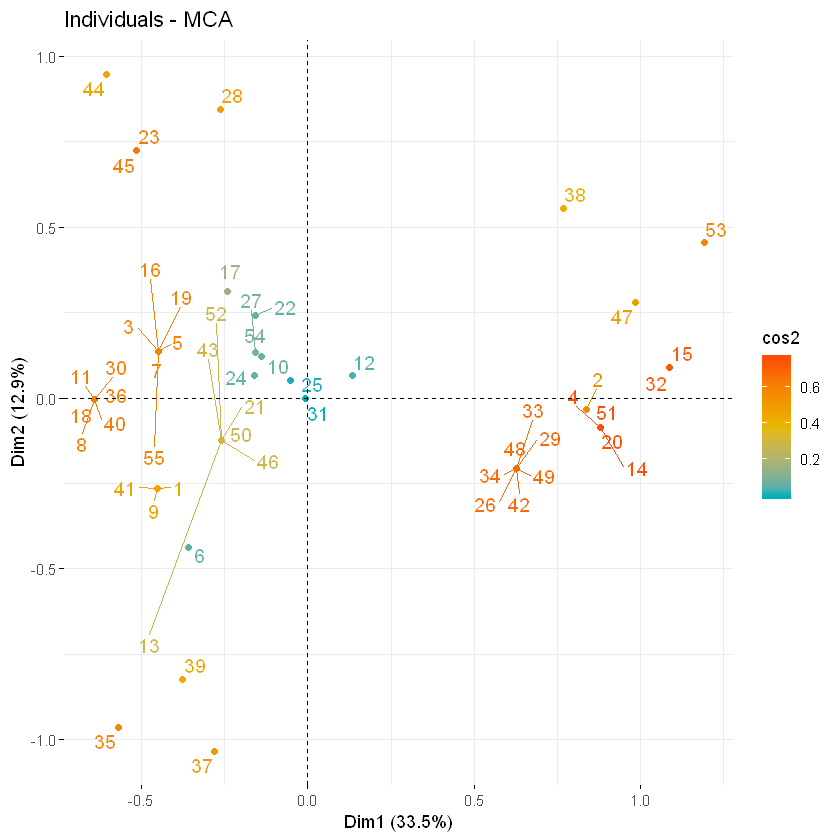

In [21]:
fviz_mca_ind(res.mca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Avoid text overlapping (slow if many points)
             ggtheme = theme_minimal())

#### Coloreando a los individuos por grupo

se puede agregar una elipse de concentración alrededor de cada grupo usando el argumento addEllipses = TRUE. Si desea una elipse de confianza alrededor del punto medio de las categorías, use ellipse.type = "confidence"El argumento palettese usa para cambiar los colores del grupo.

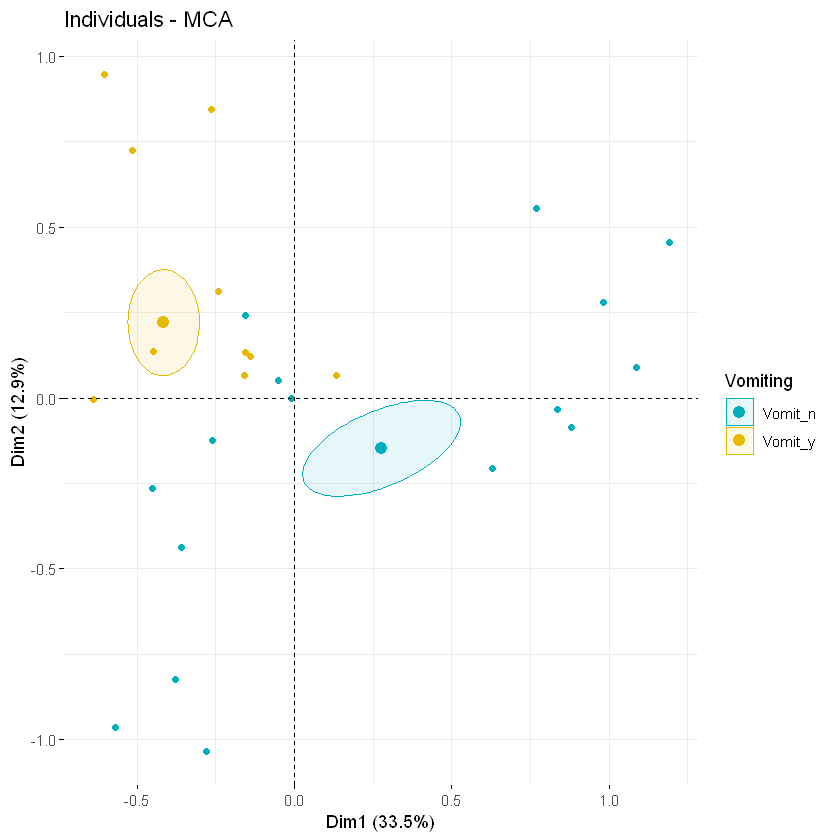

In [22]:
fviz_mca_ind(res.mca, 
             label = "none", # hide individual labels
             habillage = "Vomiting", # color by groups 
             palette = c("#00AFBB", "#E7B800"),
             addEllipses = TRUE, ellipse.type = "confidence",
             ggtheme = theme_minimal()) 